# Module 03 - Computer Vision with PyTorch


### 0. Computer Vision Libraries
* `torch.vision`
* `torch.vision.datasets` -> Get datasets and data loading fucntions for computer vision here.
* `torch.vision.models` -> Get pre/trained computer vision models that you can leverage for your own problems.
* `torch.vision.transforms` -> Functions for manipulating your vision data (images) to be suitable for use with an ML model.
* `torch.utils.data.Dataset` -> Base dataset class for PyTorch.
* `torch.utils.data.DatLoader` -> Create a Python iterable over a dataset.

In [4]:
# PyTorch
import torch
import torch.nn as nn

# Torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Data Manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Path
from pathlib import Path

# Seed
MY_SEED = 42

# Versions
print(f'PyTorch Version: {torch.__version__}')
print(f'TorchVision Version: {torchvision.__version__}')


PyTorch Version: 2.7.0+cu118
TorchVision Version: 0.22.0+cu118


### 1. Getting a Dataset
We'll use FashionMNIST from torchvision.datasets.

In [5]:
# Setup Training Data
from torchvision import datasets
train_data = datasets.FashionMNIST(root='data', train=True, download=True,
                                   transform=torchvision.transforms.ToTensor(),
                                   target_transform=None)
test_data = datasets.FashionMNIST(root='data', train=False, download=True, transform=ToTensor(),target_transform=None)
len(train_data), len(test_data)

(60000, 10000)

#### 1.1. Exploring Dataset Specifications

In [6]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
class_to_idx = train_data.class_to_idx
class_names = train_data.classes
train_targets = train_data.targets
class_to_idx, class_names, train_targets

({'T-shirt/top': 0,
  'Trouser': 1,
  'Pullover': 2,
  'Dress': 3,
  'Coat': 4,
  'Sandal': 5,
  'Shirt': 6,
  'Sneaker': 7,
  'Bag': 8,
  'Ankle boot': 9},
 ['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 tensor([9, 0, 0,  ..., 3, 0, 5]))

In [10]:
# Check Input and Output Shapes
print(f'Image Shape: {image.shape}, -> [color_channels, height, width]')
print(f'Image Label: {class_names[label]}')

Image Shape: torch.Size([1, 28, 28]), -> [color_channels, height, width]
Image Label: Ankle boot


#### 1.2. Visualizing our Data

Image Shape: torch.Size([1, 28, 28])


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

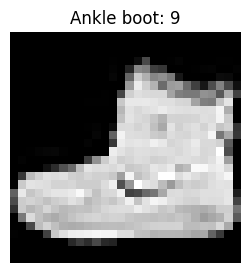

In [7]:
# Visulize 1 Image Data
image, label = train_data[0]
print(f'Image Shape: {image.shape}')
plt.figure(figsize=(3,3))
plt.imshow(image.squeeze(), cmap='gray'); plt.title(f'{class_names[label]}: {label}'); plt.axis(False)

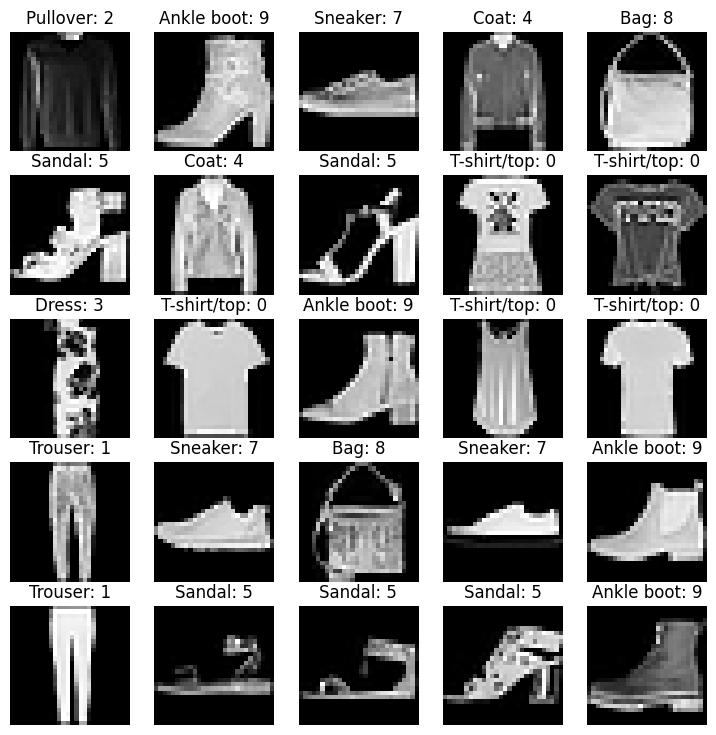

In [8]:
 # Plot more images
# torch.manual_seed(MY_SEED); torch.cuda.manual_seed(MY_SEED)

fig = plt.figure(figsize=(9,9))
rows, cols =5, 5

for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray'); plt.title(f'{class_names[label]}: {label}'); plt.axis(False)

### 2. Prepare DataLoader

Right now, our data is in the form oh PyTorch Datasets.

DataLoader turns our dataset into a Python iterable. More specifically, we want to turn our data into **Minibatches!!!**

But, why?
1. More computationally efficient. Instead of look 60000 images at a time, our computer only has to see 32 images (`batch_size=32`) at a time.
2. It gives our neural network more chances to update it gradient per epoch.

In [9]:
# Original Train and Test Data
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [10]:
# Data Loading
from torch.utils.data import DataLoader
BATCH_SIZE = 32 # Hyperparameter
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False) # --> Recommended not to Shuffle the Test Data
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x25b07197e00>,
 <torch.utils.data.dataloader.DataLoader at 0x25b092ab610>)

In [11]:
# Let-s checkout what we have created
print(f'DataLoaders: {train_dataloader, test_dataloader}')
print(f'Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...')
print(f'Length of test_dataloader:  {len(test_dataloader)}  batches of {BATCH_SIZE}...')

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000025B07197E00>, <torch.utils.data.dataloader.DataLoader object at 0x0000025B092AB610>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader:  313  batches of 32...


In [12]:
# Checkout what's inside of our training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image Shape: torch.Size([1, 28, 28])
Label Shape: torch.Size([])


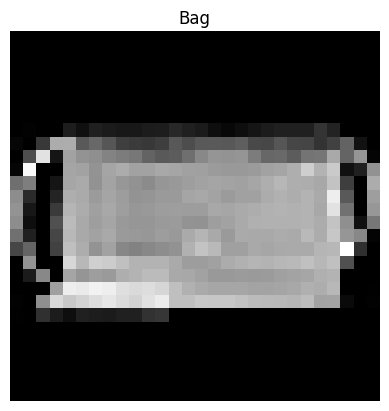

In [13]:
# Show a sample of the batch we just created
torch.manual_seed(MY_SEED)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray'); plt.axis(False); plt.title(class_names[label])
print(f'Image Shape: {img.shape}')
print(f'Label Shape: {label.shape}')

### 3. Model 0: Build a baseline model

When starting to build a series of machine learning modeeling experiments, it's best to practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon a subsequent models/experiments

In other words: Start simply and add complexity when necessary.

In [14]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a simple image from the already created batch
x = train_features_batch[0]    # --> [color_channels, height, width]
flattened_x = flatten_model(x) # --> [color_channels, height*width]
print(f'Shape before: {x.shape}')
print(f'Shape after: {flattened_x.shape}')


Shape before: torch.Size([1, 28, 28])
Shape after: torch.Size([1, 784])


In [15]:
# Build the Model Structure

class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, output_shape: int, hidden_units: int):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self,x):
        return self.layer_stack(x)
    
torch.manual_seed(MY_SEED); torch.cuda.manual_seed(MY_SEED)
model_0 = FashionMNISTModelV0(input_shape=28*28, output_shape=len(class_names), hidden_units=10).to('cpu')
model_0


FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [16]:
dummy_x = torch.rand([1, 1, 28, 28])

model_0.eval()
with torch.inference_mode():
    a = model_0(dummy_x)
b = torch.softmax(a, dim=1); c = torch.argmax(b, dim=1)
a, a.shape, b, c

(tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
          -0.1004,  0.0157]]),
 torch.Size([1, 10]),
 tensor([[0.0819, 0.1160, 0.0891, 0.0656, 0.1533, 0.1044, 0.1167, 0.1106, 0.0764,
          0.0858]]),
 tensor([4]))

#### 3.1. Loss Function and Optimizer
* Loss Function: `nn.CrossEntropyLoss` --> since we're working with MultiClass Classification
* Optimizer: `torch.optim.SGD()`
* Metric: Accuracy

In [17]:
import requests
from pathlib import Path

# Download helper functions
if Path('helper_functions.py').is_file():
    print('helper_functions.py already exists, skipping download...')

else:
    print('Downloding helper_functions.py')
    request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
    with open('helper_functions.py', 'wb') as f:
        f.write(request.content)

helper_functions.py already exists, skipping download...


In [18]:
# Import accuracy metric
from helper_functions import accuracy_fn
import time

# Loss Function & Optimizer
criterion_0 = nn.CrossEntropyLoss()
optimizer_0 = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

#### 3.2. Creating a Function to Time our experiments

ML is very experimental.
Tow of the main thing you'll often want to track are:
* **Model's performance:** (loss & accuracy values)
* **How fast it runs**

In [19]:
def print_train_time(start: float, end: float, device: torch.device = None):

    """Prints difference bwteen start and end time."""
    total_time = end-start
    print(f'{'-'*60}\nTrain Time on {device}: {total_time:.3f} seconds')
    return total_time

In [20]:
from timeit import default_timer as timer
start_time = timer()
stop_time = timer()
print_train_time(start=start_time, end=stop_time, device = 'cpu')

------------------------------------------------------------
Train Time on cpu: 0.000 seconds


1.7499987734481692e-05

#### 3.3. Creating a Training Loop with Batches

In [21]:
# Import tqdm for Progress Bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(MY_SEED); torch.cuda.manual_seed(MY_SEED)
train_start_time_on_cpu = timer()

# HYPERPARAMETERS
EPOCHS = 3; i =0

# Create Training/Test Loop
for epoch in tqdm(range(EPOCHS)):
    print(f'{'-'*60}\nEpoch: {epoch}')
    
    # Training
    epoch_loss = 0      # --> Loss per Epoch
    epoch_acc = 0       # --> Acc per Epoch
    test_epoch_loss = 0 # --> Test_Loss per Epoch
    test_epoch_acc = 0  # --> Test_Acc per Epoch

    # Loop for Training Batches
    for batch, (X_train_batch, y_train_batch) in enumerate(train_dataloader):
        model_0.train()
        output = model_0(X_train_batch); probs = torch.softmax(output, dim=1); preds = torch.argmax(probs, dim=1)
        loss = criterion_0(output, y_train_batch) # --> Loss per Batch
        epoch_loss += loss # Accumulate Train Loss
        acc = accuracy_fn(y_true=y_train_batch, y_pred=preds)
        epoch_acc += acc
        optimizer_0.zero_grad()
        loss.backward()
        optimizer_0.step()

        if (batch % 400 == 0):
            print(f'Looked at {batch * len(X_train_batch)} / {len(train_dataloader.dataset)} samples.')
    
    # Calculate Train Loss and Accuracy per EPOCH
    epoch_loss = epoch_loss/len(train_dataloader)
    epoch_acc  = epoch_acc/len(train_dataloader)

    # Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test_batch, y_test_batch in test_dataloader:
            test_output = model_0(X_test_batch)
            test_probs = torch.softmax(test_output, dim=1); test_preds = torch.argmax(test_probs, dim=1); 
            test_loss = criterion_0(test_output, y_test_batch)
            test_epoch_loss += test_loss
            test_acc = accuracy_fn(y_true=y_test_batch, y_pred=test_preds)
            test_epoch_acc += test_acc
        
        # Caclulate Test Loss and Accuracy per EPOCH
        test_epoch_loss = test_epoch_loss/len(test_dataloader)
        test_epoch_acc  = test_epoch_acc/len(test_dataloader)

    print(f'Train_Loss: {epoch_loss:.4f} | Train_Acc: {epoch_acc:.2f}% | Test_Loss: {test_epoch_loss:.4f} | Test_Acc: {test_epoch_acc:.2f}%')

train_end_time_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_start_time_on_cpu, end=train_end_time_on_cpu, device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

------------------------------------------------------------
Epoch: 0
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.
Train_Loss: 0.9096 | Train_Acc: 70.87% | Test_Loss: 0.6290 | Test_Acc: 78.63%
------------------------------------------------------------
Epoch: 1
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.
Train_Loss: 0.5573 | Train_Acc: 81.09% | Test_Loss: 0.5441 | Test_Acc: 81.13%
------------------------------------------------------------
Epoch: 2
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.
Train_Loss: 0.5027 | Train_Acc: 82.75% | Test_Loss: 0.5137 | Test_Acc: 82.00%
------------------------------------------------------------
Train Time o

### 4. Make Predictions and get model_0 Results

In [22]:
# Evaluate Model Function

def eval_model(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn, device: torch.device = 'cpu'):
    """Returns a dictionary containing the results of the model predicting on data_loader.""" 

    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X, y = X.to(device), y.to(device)
            # Make Predictions
            outputs = model(X)
            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)
            
            # Accumulate Loss and Accuracy
            loss += loss_fn(outputs, y)
            acc += accuracy_fn(y, preds)

        # Scale loss and acc to find average loss/acc per epoch
        loss /= len(data_loader)
        acc  /= len(data_loader)

        return {"model_name": model.__class__.__name__,
                "model_loss": loss.item(),
                "model_acc": acc}

model_0_results = eval_model(model_0, test_dataloader, criterion_0, accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5136752128601074,
 'model_acc': 81.9988019169329}

### 5. Set-up Device Agnostic Code

In [23]:
# Device Agnositc Code --> In THIS case my code is running faster on the cpu, so I'll set device=cpu
device = 'cuda' if torch.cuda.is_available() else 'cpu'; print(f'Device: {device}'); device = 'cpu'

Device: cuda


#### 5.1. Model 1: Building a better model with non-linearity

We learned about the power of non-linearity in notebook `02_Live_pytorch_nn_classification.ipynb`

In [24]:
# Building Model 1 Structure

class FashionMNISTModelV1(nn.Module):

    def __init__(self, input_shape: int, output_shape: int, hidden_units: int):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(), 
            nn.Linear(in_features=input_shape,  out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x):
        return self.layer_stack(x)
    
torch.manual_seed(MY_SEED); torch.cuda.manual_seed(MY_SEED)
model_1 = FashionMNISTModelV1(input_shape=28*28, output_shape=len(class_names), hidden_units=30).to(device)
model_1, next(model_1.parameters()).device

(FashionMNISTModelV1(
   (layer_stack): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=784, out_features=30, bias=True)
     (2): ReLU()
     (3): Linear(in_features=30, out_features=10, bias=True)
     (4): ReLU()
   )
 ),
 device(type='cpu'))

#### 5.2. Setup Loss, Optimizer and Evaluation Metrics

In [25]:
# Libraries
from helper_functions import accuracy_fn

# Loss Function & Optimizer
criterion_1 = nn.CrossEntropyLoss()
optimizer_1 = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

#### 5.3. Functionizinig Training and Evaluation/Tetsting Loops
* Training Loop
* Testing Loop

In [26]:
def train_step(model: nn.Module, dataloader: torch.utils.data.DataLoader, criterion: torch.nn.Module,
                optimizer: torch.optim.Optimizer, accuracy_fn, device: torch.device = device):
    """Performs a training epoch with model trying to learn on dataloader"""
    model.train()
    epoch_loss, epoch_acc = 0, 0

    for batch, (X_train_batch, y_train_batch) in enumerate(dataloader):
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)

        output = model(X_train_batch); probs = torch.softmax(output, dim=1); preds = torch.argmax(probs, dim=1)
        loss = criterion(output, y_train_batch)                         # --> Loss per Batch
        epoch_loss += loss                                              # --> Accumulate Train Loss
        epoch_acc  += accuracy_fn(y_true=y_train_batch, y_pred=preds)   # --> Accumulate Train Accuracy
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Calculate Train Loss and Accuracy per EPOCH
    epoch_loss = epoch_loss/len(dataloader)
    epoch_acc  = epoch_acc/len(dataloader)
    print(f'Train_Loss: {epoch_loss:.4f} | Train_Acc: {epoch_acc:.2f}%')


def test_step(model: nn.Module, dataloader: torch.utils.data.DataLoader, criterion: torch.nn.Module, 
              accuracy_fn, device: torch.device = device):
    """Performs a testing epoch on model going over dataloader."""
    
    test_epoch_loss, test_epoch_acc = 0, 0
    
    model.eval()
    with torch.inference_mode():
        for X_test_batch, y_test_batch in dataloader:
            X_test_batch, y_test_batch = X_test_batch.to(device), y_test_batch.to(device)

            test_outputs = model(X_test_batch)                                                          # Forward Pass
            test_probs = torch.softmax(test_outputs, dim=1); test_preds = torch.argmax(test_probs, dim=1)     # Calculate Predictions
            test_epoch_loss += criterion(test_outputs, y_test_batch)                                    # Accumulating Test Epoch Loss
            test_epoch_acc  += accuracy_fn(y_test_batch, test_preds.to(device))                         # Accumulating Test Epoch Accuracy
        
        test_epoch_loss /= len(dataloader)
        test_epoch_acc  /= len(dataloader)
        print(f'Test_Loss: {test_epoch_loss:.4f} | Test_Acc: {test_epoch_acc:.2f}%')

In [27]:
torch.manual_seed(MY_SEED), torch.cuda.manual_seed(MY_SEED)
# Measure Time
from timeit import default_timer as timer
train_start_time_on_gpu = timer()

# Set Epochs
EPOCHS = 3

# Create a optimization loop and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(EPOCHS)):

    print(f'{'-'*60}\nEpoch: {epoch}')

    # Training
    train_step(model_1, train_dataloader, criterion_1, optimizer_1, accuracy_fn, device)

    # Testing
    test_step(model_1, test_dataloader, criterion_1, accuracy_fn, device)

train_end_time_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_start_time_on_gpu, end=train_end_time_on_gpu, device=str(next(model_1.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

------------------------------------------------------------
Epoch: 0
Train_Loss: 0.7272 | Train_Acc: 74.00%
Test_Loss: 0.4709 | Test_Acc: 83.01%
------------------------------------------------------------
Epoch: 1
Train_Loss: 0.4357 | Train_Acc: 84.31%
Test_Loss: 0.4473 | Test_Acc: 84.04%
------------------------------------------------------------
Epoch: 2
Train_Loss: 0.3995 | Train_Acc: 85.56%
Test_Loss: 0.4185 | Test_Acc: 84.95%
------------------------------------------------------------
Train Time on cpu: 27.745 seconds


In [28]:
# Get Model_1 results dictionary
model_1_results = eval_model(model=model_1, data_loader=test_dataloader, loss_fn=criterion_1, accuracy_fn=accuracy_fn, device=device)
model_1_results, model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

({'model_name': 'FashionMNISTModelV1',
  'model_loss': 0.41847512125968933,
  'model_acc': 84.95407348242811},
 {'model_name': 'FashionMNISTModelV0',
  'model_loss': 0.5136752128601074,
  'model_acc': 81.9988019169329})

### 6. Model 2: Building a Convolutional Neural Network (CNN)
CNN's are also known as ConvNets.

CNN's are known for their capabilities to find patterns in visual data.

***Recommended WebSite:*** 

In [29]:
# Create a Convolutional Neural Network

class FashionMNISTModelV2(nn.Module):
    '''Model arquitechture that replicates the TinnyVGG 
    mode from CNN explainer website'''


    def __init__(self, input_shape: int, output_shape: int, hidden_units: int):
        super().__init__()

        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, 
                      kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                      kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                      kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                      kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x); #print(f'After conv_block_1: {x.shape}')
        x = self.conv_block_2(x); #print(f'After conv_block_2: {x.shape}')
        x = self.classifier(x); #print(f'After classifier: {x.shape}')
        return x


In [30]:
import torch
torch.manual_seed(MY_SEED)
model_2 = FashionMNISTModelV2(input_shape=1, output_shape=len(class_names), hidden_units=20)
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=980, out_features=10, bias=True)
  )
)

In [31]:
# Run a rand tensor with the shape of our images in the dataset through the CNN to see the shape of each output stage
rand_image_tensor = torch.randn(size=(1, 28, 28))
print(f'InitialImage Shape: {rand_image_tensor.shape}')
model_2(rand_image_tensor.unsqueeze(dim=0))


InitialImage Shape: torch.Size([1, 28, 28])


tensor([[-0.0850, -0.0175, -0.0502,  0.0433, -0.0013,  0.0395, -0.0038, -0.0309,
         -0.0619,  0.0125]], grad_fn=<AddmmBackward0>)

#### 6.1. Stepping through `nn.Conv2d()`

In [32]:
torch.manual_seed(MY_SEED)

# Create a batch of images
images = torch.randn(size = (32, 3, 66, 66))
test_image = images[0]

print(f'Image bacth shape: {images.shape}')
print(f'Single image shape: {test_image.shape}')
# print(f'Test image:\n{test_image}')

Image bacth shape: torch.Size([32, 3, 66, 66])
Single image shape: torch.Size([3, 66, 66])


In [33]:
# Create a single conv layer
conv_layer = nn.Conv2d(in_channels=3, out_channels=10,
                       kernel_size=3, stride=1, padding=0) 

# Create a single layer nn.MaxPool2d()
max_pool_layer = nn.MaxPool2d(kernel_size=4)

conv_output = conv_layer(test_image.unsqueeze(dim=0))
test_image.unsqueeze(dim=0).shape, conv_output.shape

(torch.Size([1, 3, 66, 66]), torch.Size([1, 10, 64, 64]))

In [34]:
# Print original image shape with and w/o unsqueezed()
print(f'Test Image Original Shape: {'-'*3+'>'} {test_image.shape}')
print(f'Test Image with Unsqueezed dim: {test_image.unsqueeze(dim=0).shape}')

# Pass data through Conv & Max_pool layers
test_image_conv = conv_layer(test_image.unsqueeze(dim=0))
test_image_maxpool = max_pool_layer(test_image_conv)

# Printing
print(f'Shape after Conv(): {'-'*10+'>'} {test_image_conv.shape}')
print(f'Shape after Conv() + MaxPool(): {test_image_maxpool.shape}')


Test Image Original Shape: ---> torch.Size([3, 66, 66])
Test Image with Unsqueezed dim: torch.Size([1, 3, 66, 66])
Shape after Conv(): ----------> torch.Size([1, 10, 64, 64])
Shape after Conv() + MaxPool(): torch.Size([1, 10, 16, 16])


#### 6.2. Setup Loss Function and Optimizer for Model_2

In [35]:
# Setup loss_fn, otpimizer and eval metrics
from helper_functions import accuracy_fn

criterion_2 = nn.CrossEntropyLoss()
optimizer_2 = torch.optim.SGD(params=model_2.parameters(), lr=0.1)


#### 6.3. Trianing and Testing Model 2

In [36]:
torch.manual_seed(MY_SEED); torch.cuda.manual_seed(MY_SEED)
device = 'cuda'; model_2 = model_2.to(device)

# Measure Time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Set Epochs
EPOCHS = 5

# Create a optimization loop and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(EPOCHS)):

    print(f'{'-'*60}\nEpoch: {epoch}')

    # Training
    train_step(model_2, train_dataloader, criterion_2, optimizer_2, accuracy_fn, device)

    # Testing
    test_step(model_2, test_dataloader, criterion_2, accuracy_fn, device)

train_end_time_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2, end=train_end_time_model_2, device=str(next(model_2.parameters()).device))

  0%|          | 0/5 [00:00<?, ?it/s]

------------------------------------------------------------
Epoch: 0
Train_Loss: 0.5406 | Train_Acc: 80.32%
Test_Loss: 0.3606 | Test_Acc: 87.30%
------------------------------------------------------------
Epoch: 1
Train_Loss: 0.3308 | Train_Acc: 88.21%
Test_Loss: 0.3233 | Test_Acc: 88.35%
------------------------------------------------------------
Epoch: 2
Train_Loss: 0.2920 | Train_Acc: 89.45%
Test_Loss: 0.2932 | Test_Acc: 89.44%
------------------------------------------------------------
Epoch: 3
Train_Loss: 0.2691 | Train_Acc: 90.38%
Test_Loss: 0.2934 | Test_Acc: 89.26%
------------------------------------------------------------
Epoch: 4
Train_Loss: 0.2544 | Train_Acc: 90.82%
Test_Loss: 0.2773 | Test_Acc: 89.93%
------------------------------------------------------------
Train Time on cuda:0: 57.513 seconds


In [37]:
# Get model_2 results
model_2_results = eval_model(model=model_2, data_loader=test_dataloader, loss_fn=criterion_2,
                             accuracy_fn=accuracy_fn, device=device)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.2772977948188782,
 'model_acc': 89.92611821086263}

### 7. Compare model results and training time


In [38]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results['train_time'] = [total_train_time_model_0, total_train_time_model_1, total_train_time_model_2]
compare_results


,model_name,model_loss,model_acc,train_time
0,FashionMNISTModelV0,0.513675,81.998802,27.330052
1,FashionMNISTModelV1,0.418475,84.954073,27.745493
2,FashionMNISTModelV2,0.277298,89.926118,57.512566


Text(0, 0.5, 'model')

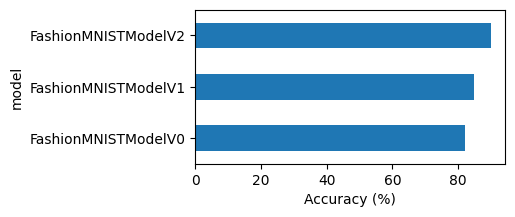

In [39]:
# Visualize results
plt.figure(figsize=(4,2))
compare_results.set_index('model_name')['model_acc'].plot(kind='barh')
plt.xlabel('Accuracy (%)'); plt.ylabel('model')

#### 7.1. Make and evaluate random predictions with best model

In [40]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
        
            sample = torch.unsqueeze(sample, dim=0).to(device)
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) 

            # Get pred_prob off the GPU for next calcs
            pred_probs.append(pred_prob.cpu())

    return torch.stack(pred_probs)

In [41]:
import random
# random.seed(MY_SEED)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

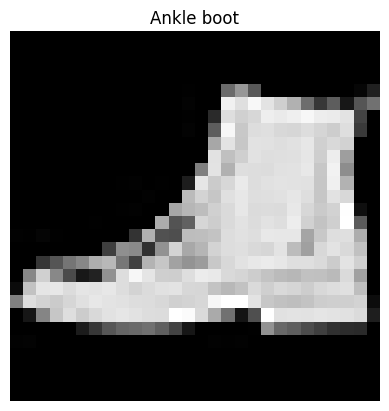

In [42]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]]); plt.axis(False)

torch.Size([1, 28, 28])
Pred_Classes: tensor([9, 0, 0, 2, 8, 2, 7, 1, 2])


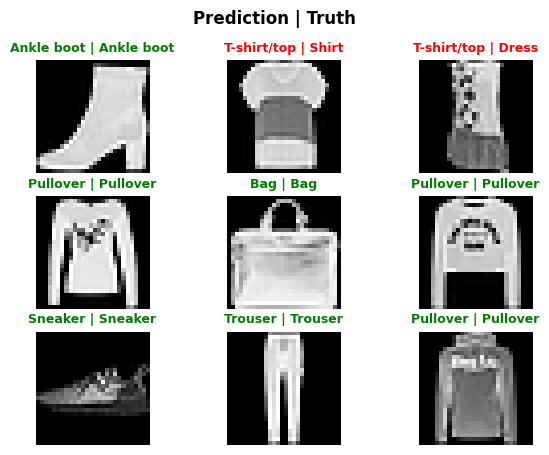

In [43]:
# Select Randome Samples from the Test Data and Make Predictions using make_predictions()

# ==============================================================================================

# Select random samples
import random # random.seed(MY_SEED)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)
print(test_samples[0].shape)

# ==============================================================================================

# Make Predictions
pred_probs_model_2 = make_predictions(model=model_2, data=test_samples)
pred_classes = torch.argmax(pred_probs_model_2, dim=1) # Convert predictions probs to labels
print(f'Pred_Classes: {pred_classes}')

# ==============================================================================================

# Plot figures
plt.figure(figsize=(7,5))
n_rows=3; n_cols=3;  

for i, sample in enumerate(test_samples):
    plt.subplot(n_rows, n_cols, i+1)
    plt.imshow(sample.squeeze(), cmap='gray'); plt.axis(False)

    pred_label = class_names[pred_classes[i]]
    true_label = class_names[test_labels[i]]

    text_title = f'{pred_label} | {true_label}'

    if pred_label == true_label:
        plt.title(text_title, fontsize=9, c='g', weight='bold')
    else:
        plt.title(text_title, fontsize=9, c='r', weight='bold')
    plt.suptitle('Prediction | Truth', fontsize=12, weight='bold')

### 8. Making a Confusion Matrix for Further Prediction Evaluation

A confusion matrix is a fantastic way for further evaluation of a classification model.

1. Make predictions with our trained model on the test dataset.
2. Make a confusion matrix with `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix unsing `mlxtend.plotting.plot_confusion_matrix()`


In [44]:
# Import t1dm.audo
from tqdm.auto import tqdm

# 1. make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc='Making predictions'):
        X, y = X.to(device), y.to(device)
        y_logits = model_2(X)
        y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
        y_preds.append(y_pred.cpu())

# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor.shape

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

torch.Size([10000])

In [45]:
import torchmetrics, mlxtend
print(f'mlextend version: {mlxtend.__version__}')
assert int(mlxtend.__version__.split('.')[1]) >= 19, 'mlxtend version should be 0.19.0 or higher'

mlextend version: 0.23.4


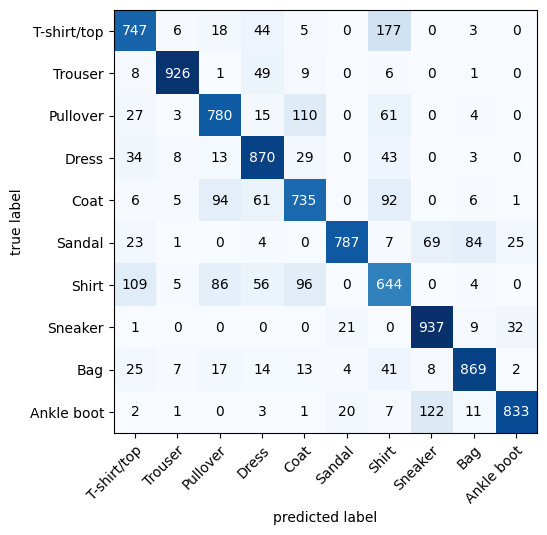

In [56]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confiusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)

# 3. Plot Confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(), class_names= class_names, figsize=(6,5.5))

### 9. Save and Load the model

In [67]:
# Import Libraries
from pathlib import Path

# Create Paths
FOLDER_PATH = Path('models'); FOLDER_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = '03_pytorch_computer_vision_model_2.pth'
MODEL_PATH = FOLDER_PATH / MODEL_NAME

# Save Model
print(f'Saving model to: {MODEL_PATH}')
torch.save(obj=model_2.state_dict(), f=MODEL_PATH)

Saving model to: models\03_pytorch_computer_vision_model_2.pth


In [68]:
loaded_model_2 = FashionMNISTModelV2(input_shape=1, output_shape=len(class_names), hidden_units=20)
loaded_model_2.load_state_dict(torch.load(f=MODEL_PATH))
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=980, out_features=10, bias=True)
  )
)

In [72]:
# Evaluate Loaded Model and Compare it to the Original
loaded_model_2_results = eval_model(loaded_model_2, test_dataloader, loss_fn=criterion_2, accuracy_fn=accuracy_fn, device=device)
print(loaded_model_2_results, model_2_results)

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2', 'model_loss': 0.2772977948188782, 'model_acc': 89.92611821086263} {'model_name': 'FashionMNISTModelV2', 'model_loss': 0.2772977948188782, 'model_acc': 89.92611821086263}


In [74]:
torch.isclose(torch.tensor(model_2_results['model_loss']), torch.tensor(loaded_model_2_results['model_loss']))

tensor(True)